In [1]:
import sys
sys.path.append('..')

from helper_fun import *
import helper_fun
from Split_functions_classify.splits_two import *
from Split_functions_classify.splits_three import *
from Split_functions_classify.splits_ten import *

SEED = 22
seed_everything(SEED)

compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')
compounds.head(2)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040


In [2]:
two_split(compounds)
three_split(compounds)
ten_split(compounds).head()



,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040,0,medium,1
2,126,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-3,4.222340,8.201698,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435d20>,275.082540,3,2,2.80682,True,5.374447,5.086096,1,medium,5
3,129,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-6,24.581194,13.895165,<rdkit.Chem.rdchem.Mol object at 0x7fc31a435e70>,260.071641,2,1,3.22462,True,4.609397,4.857136,0,medium,2
4,135,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,TRY-UNI-714a760b-12,64.508813,45.689263,<rdkit.Chem.rdchem.Mol object at 0x7fc31a436110>,261.066890,2,2,3.68742,True,4.190381,4.340186,0,medium,1


In [3]:
compound_df = compounds.copy()
compound_df["maccs"] = compound_df["SMILES"].apply(smiles_to_fp,)

In [4]:
fingerprint_to_model = compound_df.maccs.tolist()

# Bins 2 #

In [5]:
#change variables to _2 at end
label_to_model_2 = compound_df.bin_2.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_2,
    static_test_x_2,
    static_train_y_2,
    static_test_y_2,
) = train_test_split(fingerprint_to_model, label_to_model_2, test_size=0.2, random_state=SEED)
splits_2 = [static_train_x_2, static_test_x_2, static_train_y_2, static_test_y_2]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_2))
print("Test data size:", len(static_test_x_2))


# Set model parameter for random forest
param_2 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_2 = RandomForestClassifier(**param_2)

Training data size: 476
Test data size: 119


In [6]:
performance_measures = model_training_and_validation(model_RF_2, "RF", splits_2)

Sensitivity: 0.75
Specificity: 0.76
AUC: 0.83


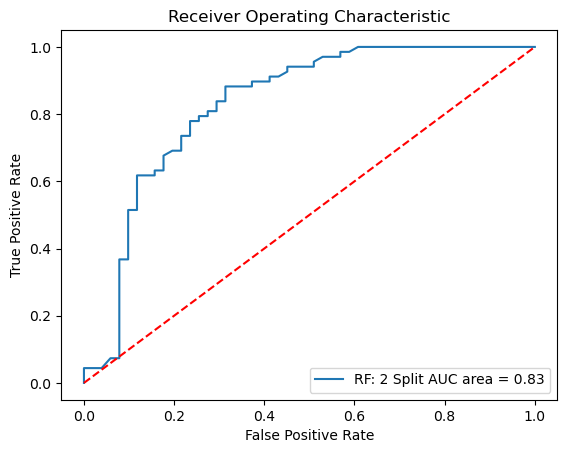

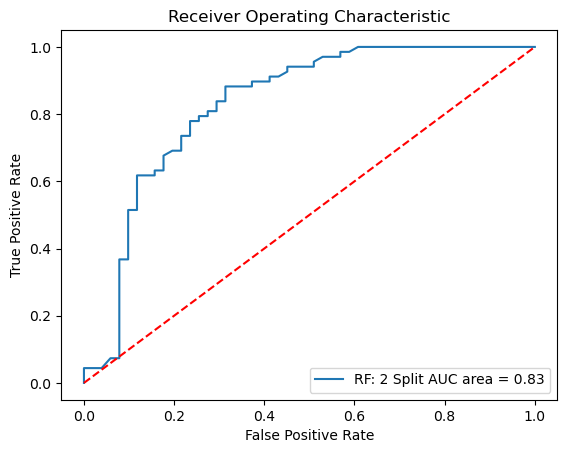

In [7]:
models = [{"label": "RF: 2 Split", "model": model_RF_2}]
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2)

# Bins 3 #

In [8]:
#change variables to _3 at end
label_to_model_3 = compound_df.bin_3.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_3,
    static_test_x_3,
    static_train_y_3,
    static_test_y_3,
) = train_test_split(fingerprint_to_model, label_to_model_3, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_3, static_test_x_3, static_train_y_3, static_test_y_3]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_3))
print("Test data size:", len(static_test_x_3))


# Set model parameter for random forest
param_3 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_3 = RandomForestClassifier(**param_3)

Training data size: 476
Test data size: 119


In [9]:
bins_label_3 = ['low','medium','high']
model_RF_3.fit(static_train_x_3,static_train_y_3)
test_prob_RF_3 = model_RF_3.predict_proba(static_test_x_3)

### Plot the ROC curves using One vs Rest and micro-averaging ###

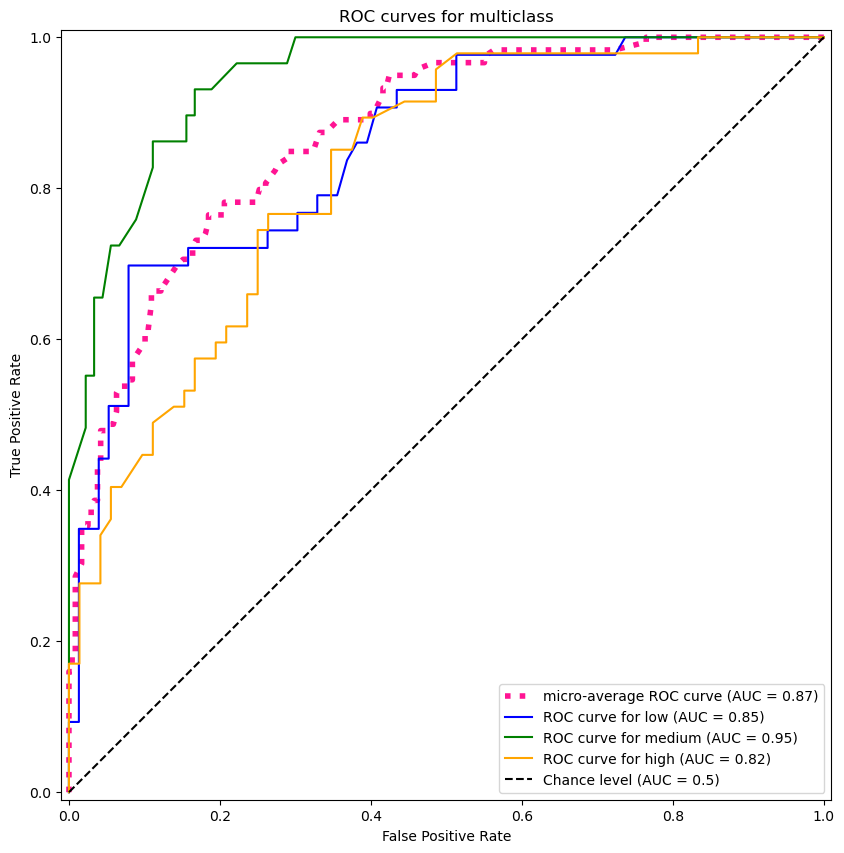

In [10]:
plot_roc_for_multi_class(model_RF_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

### MCC for 3 classes ###

In [12]:
y_pred_RF_3 = model_RF_3.predict(static_test_x_3)
matthews_corrcoef_RF_3 = matthews_corrcoef(static_test_y_3,y_pred_RF_3)
print("MCC:",matthews_corrcoef_RF_3)

MCC: 0.5312992865929028


### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [13]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="micro")
print("F1 score using micro average is:",f1_score_RF_3)

F1 score using micro average is: 0.6890756302521008


In [14]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="macro")
print("F1 score using macro average is:",f1_score_RF_3)

F1 score using macro average is: 0.6955026455026455


# Bins 10 #

In [11]:
#change variables to _10 at end
label_to_model_10 = compound_df.bin_10.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_10,
    static_test_x_10,
    static_train_y_10,
    static_test_y_10,
) = train_test_split(fingerprint_to_model, label_to_model_10, test_size=0.2, random_state=SEED)
splits_10 = [static_train_x_10, static_test_x_10, static_train_y_10, static_test_y_10]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_10))
print("Test data size:", len(static_test_x_10))


# Set model parameter for random forest
param_10 = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF_10 = RandomForestClassifier(**param_10)

Training data size: 476
Test data size: 119


In [16]:
bins_label_10 = ['0','1','2','3','4','5','6','7','8','9']
model_RF_10.fit(static_train_x_10,static_train_y_10)
test_prob_RF_10 = model_RF_10.predict_proba(static_test_x_10)

### Plot the ROC curves using One vs Rest and micro-averaging ###

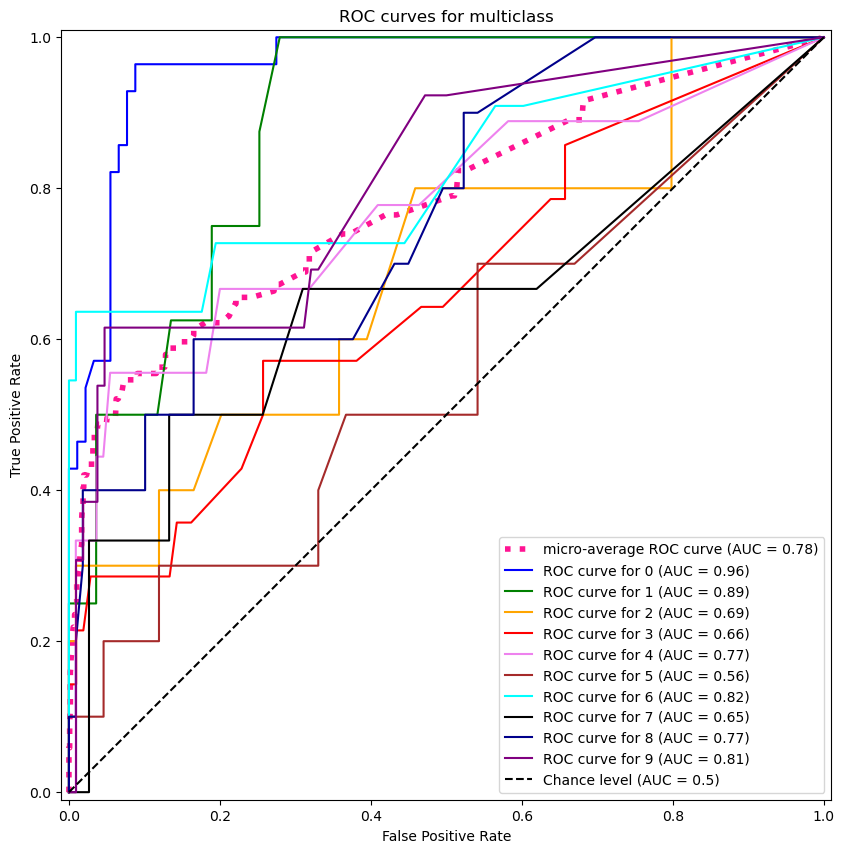

In [20]:
plot_roc_for_multi_class(model_RF_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

### MCC for 3 classes ###

In [ ]:
y_pred_RF_3 = model_RF_3.predict(static_test_x_3)
matthews_corrcoef_RF_3 = matthews_corrcoef(static_test_y_3,y_pred_RF_3)
print("MCC:",matthews_corrcoef_RF_3)

MCC: 0.5312992865929028


### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [ ]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="micro")
print("F1 score using micro average is:",f1_score_RF_3)

F1 score using micro average is: 0.6890756302521008


In [ ]:
f1_score_RF_3 = f1_score(static_test_y_3,y_pred_RF_3,average="macro")
print("F1 score using macro average is:",f1_score_RF_3)

F1 score using macro average is: 0.6955026455026455
